In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
iris=pd.read_csv('iris.csv')

In [15]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
X=iris.iloc[:,:-1]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [19]:
y = iris.iloc[:,-1]
y


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [20]:
#data Normalization
from sklearn import preprocessing
X =preprocessing.StandardScaler().fit_transform(X)

In [21]:
X[0:4]

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 5)
knnmodel.fit(X_train,y_train)
ypredict = knnmodel.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,ypredict)
acc

1.0

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypredict)
cm

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]], dtype=int64)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
acc_list = []
err_list = []
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
#     print("For k = {}, accuracy = {}".format(i,acc))
    acc_list.append(acc)
    err_list.append(1-acc)

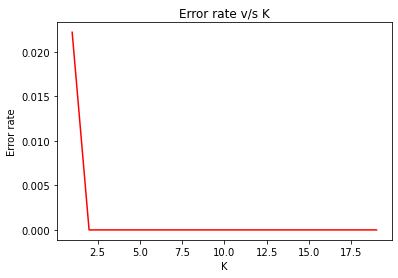

In [34]:
plt.plot(list(range(1,20)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()